# Climbing Data Analysis May 2022-May 2023

## Overview of the Project

FILL IN LATER

## Importing the Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## Importing the Dataset

In [2]:
# The dataset is currently stored on and imported from GitHub (as of May 2023)
URL = "https://raw.githubusercontent.com/Habeus-Crimpus/Climbing_Analysis/main/Climbing_Data_CSV.csv"
df = pd.read_csv(URL)

**IMPORTANT NOTE:** The dataset at the above URL is not pre-cleaned.

## Examining at the Table

In [3]:
df.head()

,Date,Type_of_Climbing,Country,Location,Grade,Attempts,Completed,Crux_Move_Type,Repeat,Terrain
0,5/24/22,Bouldering,United States,Gravity Vault Montclair,V9,3.0,yes,crimp,no,overhang
1,5/24/22,Bouldering,United States,Gravity Vault Montclair,V7,2.0,yes,crimp,no,unknown
2,6/24/22,Bouldering,United States,Gravity Vault Montclair,V8,8.0,no,sloper,no,overhang
3,6/24/22,Bouldering,United States,Gravity Vault Montclair,V6,1.0,yes,crimp,no,unknown
4,7/18/22,Bouldering,United States,Gravity Vault Montclair,V7,4.0,yes,jug,no,unknown


In [4]:
# Checking the initial dimensions of the dataframe
df.shape

(2578, 10)

In [5]:
# Getting a general description of the dataframe
df.dtypes

Date                 object
Type_of_Climbing     object
Country              object
Location             object
Grade                object
Attempts            float64
Completed            object
Crux_Move_Type       object
Repeat               object
Terrain              object
dtype: object

### List of Tasks for Cleaning/Preprocessing

1. Dropping all NaN values
2. Change the Date column into datetime objects
3. Split the Crux_Move_Type into separate words where applicable
4. Convert the Grade column to French scale
5. Make an ordering to the Grade column
6. Make a guide for how to read each of the columns' data
7. Reclean the dataset

In [6]:
# (Task 1) Dropping the NaN values
"""
The dataset has a lot of entirely empty rows which have been created during the conversion process from .xlxs to .csv.
Since they contain no information, they can just be dropped.
"""
df.dropna(inplace=True)
df.shape

(1839, 10)

In [7]:
# Confirming that no more NaN values are in the dataframe
df.isna().sum()

Date                0
Type_of_Climbing    0
Country             0
Location            0
Grade               0
Attempts            0
Completed           0
Crux_Move_Type      0
Repeat              0
Terrain             0
dtype: int64

In [8]:
# (Task 2) Changing the date column to datatime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

In [9]:
# (Task 3) Splitting the Crux_Move_type column
"""
I am motifying the Crux_Move_Type column so that each element is a list. At the moment, they are stored as strings.
Since there are climbs with multiple move types listed and the order in which the move types are listed may vary, I
have chosen to convert them to a list so that they can later be searched with the keyword 'in'.
"""
# WARNING: Running this cell multiple times without resetting the kernel will cause NaN values.
#df['Crux_Move_Type'] = df['Crux_Move_Type'].str.split('/')
#df.head(10)

,Date,Type_of_Climbing,Country,Location,Grade,Attempts,Completed,Crux_Move_Type,Repeat,Terrain
0,2022-05-24,Bouldering,United States,Gravity Vault Montclair,V9,3.0,yes,[crimp],no,overhang
1,2022-05-24,Bouldering,United States,Gravity Vault Montclair,V7,2.0,yes,[crimp],no,unknown
2,2022-06-24,Bouldering,United States,Gravity Vault Montclair,V8,8.0,no,[sloper],no,overhang
3,2022-06-24,Bouldering,United States,Gravity Vault Montclair,V6,1.0,yes,[crimp],no,unknown
4,2022-07-18,Bouldering,United States,Gravity Vault Montclair,V7,4.0,yes,[jug],no,unknown
5,2022-07-25,Bouldering,United States,Gravity Vault Montclair,V8,3.0,yes,[pinch],no,overhang
6,2022-07-25,Bouldering,International,Kilter Board,V4,1.0,yes,[dyno],no,unknown
7,2022-07-29,Bouldering,United States,Gravity Vault Montclair,V7,1.0,yes,[crimp],no,unknown
8,2022-07-29,Bouldering,United States,Gravity Vault Montclair,V8,2.0,yes,[sloper],no,unknown
9,2022-07-29,Bouldering,United States,Gravity Vault Montclair,V6,5.0,yes,"[sloper, feature]",no,unknown


In [10]:
df['Crux_Move_Type'][:30]

0              crimp
1              crimp
2             sloper
3              crimp
4                jug
5              pinch
6               dyno
7              crimp
8             sloper
9     sloper/feature
10             crimp
11              dyno
12             crimp
13             pinch
14              dyno
15      crimp/sloper
16             pinch
17               jug
18             pinch
19             pinch
20             pinch
21             crimp
22             pinch
23           sloper 
24      pinch/sloper
25           pockets
26             pinch
27            crimp 
28             crimp
29            pinch 
Name: Crux_Move_Type, dtype: object

In [15]:
# Splitting the Crux_Move_Type into binary columns
crimpy = []
slopy = []
feature_ = []
juggy = []
dyno = []
balancy = []
pinchy = []

for i in range(df.shape[0]):
    
    # Crimps
    if 'crimp' in df['Crux_Move_Type'][i]:
        crimpy.append(1)
    else:
        crimpy.append(0)
    
    # Slopers
    if 'sloper' in df['Crux_Move_Type'][i]:
        slopy.append(1)
    else:
        slopy.append(0)
        
    # Features
    if 'feature' in df['Crux_Move_Type'][i]:
        feature_.append(1)
    else:
        feature_.append(0)
    
    # Jugs
    if 'jug' in df['Crux_Move_Type'][i]:
        juggy.append(1)
    else:
        juggy.append(0)
        
    # Dynos
    if 'dyno' in df['Crux_Move_Type'][i]:
        dyno.append(1)
    else:
        dyno.append(0)
     
    # Balance moves   
    if 'balance' in df['Crux_Move_Type'][i]:
        balancy.append(1)
    else:
        balancy.append(0)
        
    # Pinches
    if 'pinch' in df['Crux_Move_Type'][i]:
        pinchy.append(1)
    else:
        pinchy.append(0)

# Making new columns in the dataframe
df['has_crimp'] = crimpy
df['has_sloper'] = slopy
df['has_feature'] = feature_
df['has_jug'] = juggy
df['has_dyno'] = dyno
df['has_balance'] = balancy
df['has_pinch'] = pinchy

In [17]:
# Getting rid of the Crux_Move_Type column (it is now redundant).
df.drop(columns='Crux_Move_Type', inplace=True)

In [18]:
df.head(3)

,Date,Type_of_Climbing,Country,Location,Grade,Attempts,Completed,Repeat,Terrain,has_crimp,has_sloper,has_feature,has_jug,has_dyno,has_balance,has_pinch
0,2022-05-24,Bouldering,United States,Gravity Vault Montclair,V9,3.0,yes,no,overhang,1,0,0,0,0,0,0
1,2022-05-24,Bouldering,United States,Gravity Vault Montclair,V7,2.0,yes,no,unknown,1,0,0,0,0,0,0
2,2022-06-24,Bouldering,United States,Gravity Vault Montclair,V8,8.0,no,no,overhang,0,1,0,0,0,0,0


In [19]:
# (Task 4) Converting all grades to French scale

# Making a dictionary of grades
us_french_boulder_dict = {'V0': '4', 'V1': '5A', 'V2': '5B', 'V3': '6A', 'V4': '6B',
                 'V5': '6C', 'V6': '7A', 'V7': '7A+', 'V8': '7B', 'V9': '7C',
                 'V10': '7C+', 'V11': '8A', 'V12': '8A+', 'V13': '8B',
                 'V14': '8B+', 'V15': '8C', 'V16': '8C+', 'V17': '9A',
                 '5.2': '1', '5.3': '2', '5.4': '3', '5.5': '4', '5.6': '5A', 
                 '5.7': '5B', '5.8': '5C', '5.9': '6A', '5.10a': '6A+', '5.10b': '6A+',
                 '5.10c': '6B', '5.10d': '6B+', '5.11a': '6C', '5.11b': '6C+',
                 '5.11c': '7A', '5.11d': '7A+', '5.12a': '7B', '5.12b': '7B+',
                 '5.12c': '7C', '5.12d': '7C+', '5.13a': '7C+', '5.13b': '8A',
                 '5.13c': '8A+', '5.13d': '8B', '5.14a': '8B+', '5.14b': '8C',
                 '5.14c': '8C+', '5.14d': '9A', '5.15a': '9A+', '5.15b': '9B',
                 '5.15c': '9B+', '5.15d': '9C'}

# Converting all US bouldergrades to French scale
grades = df['Grade']

for ind in range(len(grades)):
    if grades[ind] in us_french_boulder_dict.keys():
        grades[ind] = us_french_boulder_dict[f'{grades[ind]}']
    grades[ind] = grades[ind].strip()   # removing any excess whitespace

# Updating the Grade column in the dataframe       
df['Grade'] = grades

/var/folders/z3/_bj3y0g14f95y43g65jh8y740000gn/T/ipykernel_77766/1791464949.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grades[ind] = us_french_boulder_dict[f'{grades[ind]}']
/var/folders/z3/_bj3y0g14f95y43g65jh8y740000gn/T/ipykernel_77766/1791464949.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grades[ind] = grades[ind].strip()   # removing any excess whitespace


In [20]:
# Removing any excess white space.
df['Grade'].unique()

array(['7C', '7A+', '7B', '7A', '6B', '6C', '6C+', '6B+', '7C+', '7B+',
       '6A+', '6A', '5+', '5', '2+', '4', '5-', '3+', '5B', '5A', '8B',
       '8A', '8C', '5.10', '5.12', '8B+', '8A+', '4C', '5C', '6C_'],
      dtype=object)

In [22]:
# Locating remaining issue cases( '5.10', '5.12', '5-', and '6C_')

# List of problem rows
problems = []

# Locating the rows and replacing the values
problems.append(df[df['Grade'] == '5.10'].index) # '5.10'
problems.append(df[df['Grade'] == '5.12'].index) # '5.12'
problems.append(df[df['Grade'] == '5-'].index)   # '5-'
problems.append(df[df['Grade'] == '6C_'].index)  # '6C_'
problems.append(df[df['Grade'] == '5+'].index)   # '5+'
problems.append(df[df['Grade'] == '2+'].index)   # '2+'
problems.append(df[df['Grade'] == '3+'].index)   # '3+'
problems.append(df[df['Grade'] == '5'].index)    # '5'
problems.append(df[df['Grade'] == '4C'].index)   # '4C'
# Looking at the rows
problems

[Int64Index([340], dtype='int64'),
 Int64Index([342], dtype='int64'),
 Int64Index([117], dtype='int64'),
 Int64Index([1831], dtype='int64'),
 Int64Index([39, 69, 115, 128], dtype='int64'),
 Int64Index([105], dtype='int64'),
 Int64Index([120, 143], dtype='int64'),
 Int64Index([59, 124], dtype='int64'),
 Int64Index([1023, 1794], dtype='int64')]

In [23]:
# Replacing the issue row grades with appropriate substitutes
df.loc[340, 'Grade'] = '5.10a'  
df.loc[342, 'Grade'] = '5.12a'
df.loc[117, 'Grade'] = '5A'
df.loc[1831, 'Grade'] = '6C'
df.loc[[39, 69, 115, 128], 'Grade'] = '5C'
df.loc[105, 'Grade'] = '2'
df.loc[[120, 143], 'Grade'] = '3'
df.loc[[59, 124], 'Grade'] = '5B'
df.loc[[1023, 1794], 'Grade'] = '4'

In [24]:
# Reconverting the grades to french-scale
grades = df['Grade']

for ind in range(len(grades)):
    if grades[ind] in us_french_boulder_dict.keys():
        grades[ind] = us_french_boulder_dict[f'{grades[ind]}']
    grades[ind] = grades[ind].strip()   # removing any excess whitespace

# Updating the Grade column in the dataframe       
df['Grade'] = grades

/var/folders/z3/_bj3y0g14f95y43g65jh8y740000gn/T/ipykernel_77766/33570960.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grades[ind] = grades[ind].strip()   # removing any excess whitespace
/var/folders/z3/_bj3y0g14f95y43g65jh8y740000gn/T/ipykernel_77766/33570960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grades[ind] = us_french_boulder_dict[f'{grades[ind]}']


In [25]:
# Confirming that all grades are now correctly formatted.
df['Grade'].unique()

array(['7C', '7A+', '7B', '7A', '6B', '6C', '6C+', '6B+', '7C+', '7B+',
       '6A+', '6A', '5C', '5B', '2', '4', '5A', '3', '8B', '8A', '8C',
       '8B+', '8A+'], dtype=object)

In [26]:
# (Task 5) Adding an order to the grades

# Making a dictionary of the grades with orders
grade_order_dict = {
    '1': 1, '2': 2, '3': 3, '4': 4, '5A': 5, '5B': 6, '5C': 7, '6A': 8, '6A+': 9,
    '6B': 10, '6B+': 11, '6C': 12, '6C+': 13, '7A': 14, '7A+': 15, '7B': 16, 
    '7B+': 17, '7C': 18, '7C+': 19, '8A': 20, '8A+': 21, '8B': 22, '8B+': 23,
    '8C': 24, '8C+': 25, '9A': 26, '9A+': 27, '9B': 28, '9B+': 29, '9C': 30
}

# Making a new list of orders
grade_order = [grade_order_dict[x] for x in df['Grade']]

# Making a new order column in the dataframe
df["Grade_Order"] = grade_order


In [27]:
# Adding an index column to the dataframe
df['Climb_Number'] = np.arange(1, len(df.Date)+1)
df['Climb_Number']

0          1
1          2
2          3
3          4
4          5
        ... 
1834    1835
1835    1836
1836    1837
1837    1838
1838    1839
Name: Climb_Number, Length: 1839, dtype: int64

### List of Tasks for Visualization

1. Efficiency Rates (will require creating a new column for number of attempts required per send per grade)
2. Comparison of attempts to sends per grade
3. Average grade sent by Country
4. Average grade sent by Location
5. Overall distribution of the grades attempted (make the axes show both french and US scales)
6. Overall distribution of the grades sent (make the axes show both french and US scales)
7. Interactive geographic Map of Climbs 

In [28]:
df.columns

Index(['Date', 'Type_of_Climbing', 'Country', 'Location', 'Grade', 'Attempts',
       'Completed', 'Repeat ', 'Terrain', 'has_crimp', 'has_sloper',
       'has_feature', 'has_jug', 'has_dyno', 'has_balance', 'has_pinch',
       'Grade_Order', 'Climb_Number'],
      dtype='object')

In [29]:
# Sorting the dataframe by grade order
tmp = df.sort_values(by = 'Grade_Order')

Text(0.5, 1.0, 'Distribution of Climbs Attempted')

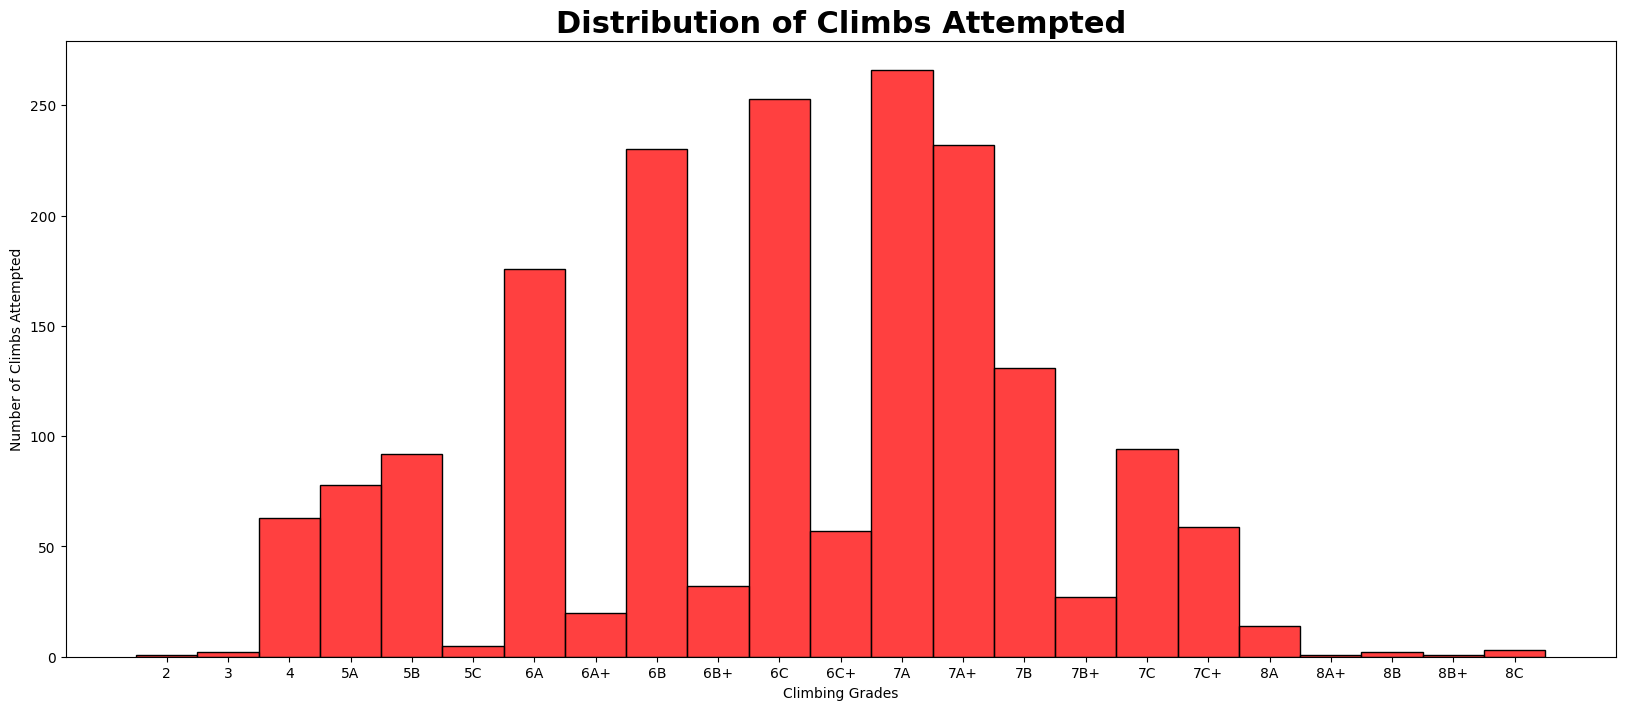

In [30]:
# Plotting the distribution of grades across attempts
plt.figure(figsize = (20, 8))
sns.histplot(data = tmp, x = 'Grade', color = 'red')
plt.xlabel('Climbing Grades')
plt.ylabel('Number of Climbs Attempted')
plt.title('Distribution of Climbs Attempted', weight = 'bold', size = 22)

Text(0.5, 1.0, 'Distribution of Climbs Completed')

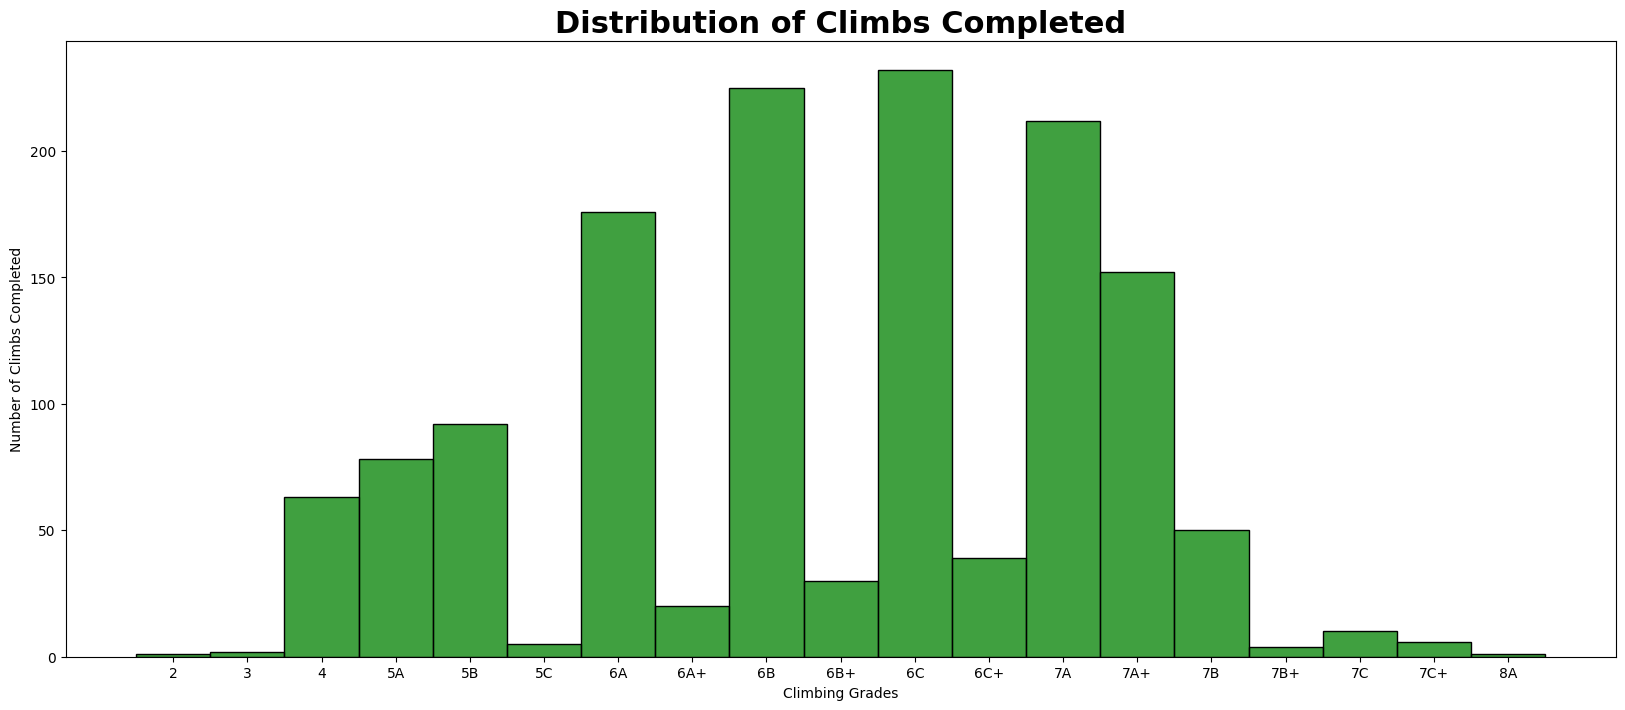

In [31]:
# Plotting the distribution of grades across sends
tmp = df.sort_values(by = 'Grade_Order')
tmp = tmp[tmp['Completed'] == 'yes']
plt.figure(figsize = (20, 8))
sns.histplot(data = tmp, x = 'Grade', color = 'green')
plt.xlabel('Climbing Grades')
plt.ylabel('Number of Climbs Completed')
plt.title('Distribution of Climbs Completed', weight = 'bold', size = 22)

Text(0, 0.5, 'Number of Attempts')

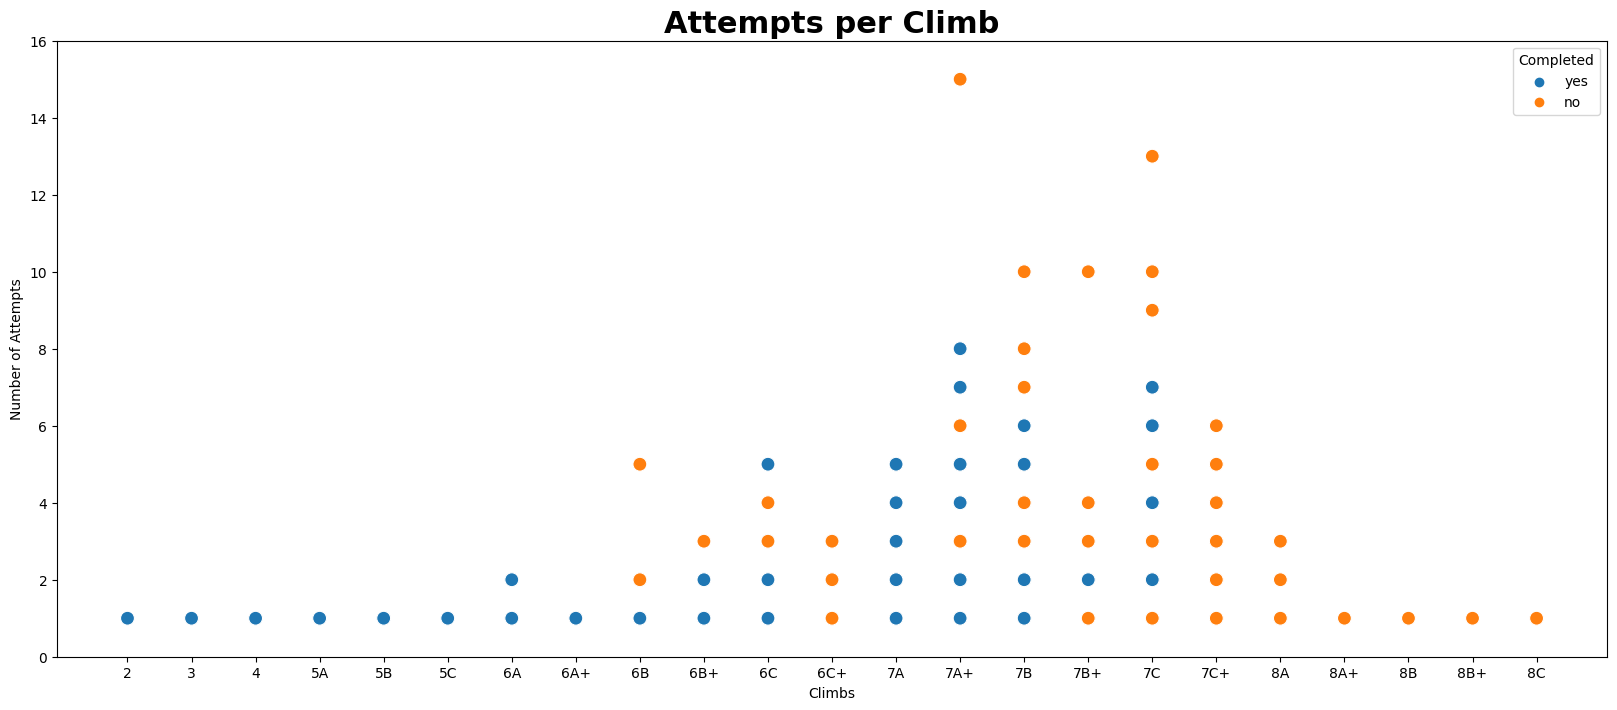

In [32]:
# Scatterplot of climbs against number of attempts
plt.figure(figsize=(20, 8))
sns.scatterplot(data = df.sort_values(by='Grade_Order'), x = 'Grade', \
                y = 'Attempts', hue = 'Completed', s = 100)
plt.ylim(0,16)
plt.title("Attempts per Climb", weight = "bold", size = 22)
plt.xlabel('Climbs')
plt.ylabel('Number of Attempts')

In [37]:
# Counting the number of climbs by crux_move_type
df.groupby(by = 'has_crimp').count() # crimps

,Date,Type_of_Climbing,Country,Location,Grade,Attempts,Completed,Repeat,Terrain,has_sloper,has_feature,has_jug,has_dyno,has_balance,has_pinch,Grade_Order,Climb_Number
has_crimp,,,,,,,,,,,,,,,,,
0,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360
1,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479
